In [2]:
#Using Sean Lahman Database to answer historical questions about team-level baseball statistics.
#Let's explore strikeouts

from pybaseball import team_pitching
from pybaseball import team_batting
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#let's collect historic team pitching data from pybaseball

pitching_data = team_pitching(1900,2022)

In [6]:
#a quick look at the data and some summary stats

pitching_data.describe()

,teamIDfg,Season,Age,W,L,ERA,G,GS,CG,ShO,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,...,240.000000,480.000000,240.000000,240.000000,480.000000,240.000000,2640.000000,630.000000,630.000000,0.0
mean,21.231439,1969.917424,27.677273,77.741667,77.730682,3.890629,429.302273,156.092803,39.997348,6.967424,...,12.150417,123.858333,0.065037,116.914167,690.125000,0.357879,351.974621,0.170110,0.266938,NaN
std,79.602022,35.389030,1.445359,14.477012,14.407925,0.700920,156.129095,13.594354,34.776300,5.483697,...,1.482111,133.432807,0.012346,1.828519,730.875833,0.026199,1147.811168,0.007285,0.012434,NaN
min,1.000000,1900.000000,22.000000,19.000000,17.000000,1.730000,124.000000,58.000000,0.000000,0.000000,...,7.800000,0.000000,0.039000,112.900000,0.000000,0.286000,0.000000,0.149000,0.237000,NaN
25%,6.000000,1940.000000,27.000000,69.000000,68.000000,3.440000,297.000000,154.000000,7.000000,3.000000,...,11.175000,0.000000,0.054000,115.675000,0.000000,0.338750,0.000000,0.165000,0.258000,NaN
50%,16.000000,1976.000000,28.000000,79.000000,78.000000,3.890000,406.000000,162.000000,34.000000,6.000000,...,12.300000,40.000000,0.065000,116.700000,230.000000,0.357000,0.000000,0.170000,0.266000,NaN
75%,24.000000,2000.250000,29.000000,88.000000,88.000000,4.340000,570.250000,162.000000,66.250000,10.000000,...,13.025000,255.000000,0.074000,118.025000,1468.000000,0.378000,0.000000,0.175000,0.275000,NaN
max,1071.000000,2022.000000,34.000000,116.000000,120.000000,6.710000,794.000000,165.000000,148.000000,32.000000,...,15.700000,411.000000,0.098000,122.400000,1860.000000,0.418000,4639.000000,0.189000,0.307000,NaN


In [26]:
# get league-average SO/game by year
league_average = pitching_data.groupby('Season', as_index=False)['K/9'].mean()
print (league_average)

     Season       K/9
0      1900  2.446250
1      1901  3.181875
2      1902  3.034375
3      1903  3.650625
4      1904  3.804375
..      ...       ...
118    2018  8.525333
119    2019  8.873333
120    2020  9.068333
121    2021  8.898667
122    2022  8.524000

[123 rows x 2 columns]


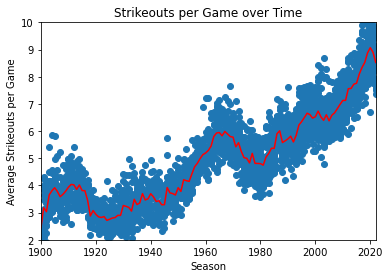

In [109]:
# Let's plot average SO per game over time
plt.scatter(pitching_data['Season'], pitching_data['K/9'])
plt.plot(league_average['Season'], league_average['K/9'], c='red')
plt.xlim(1900,2022)
plt.ylim(2,10)
plt.xlabel('Season')
plt.ylabel('Average Strikeouts per Game')
plt.title('Strikeouts per Game over Time');

#It is staggering the increment of K/9 in the game we have move from 4-6K per games to topping at 9.06 K/9 in 2020
#That means that since 2015 a new strikeout record has been set each year for five straight seasons now.

In [110]:
#Let’s look under the hood to figure it out what’s going on. First, let’s look at batters, with so many strikeouts happening is clear that something is changing for hitters. 
#Let's see how much contact they are making, and how are they swinging the bat. 

#First we are going to measure EV - Exit Velocity measures the speed of the baseball as it comes off the bat, immediately after a batter makes contact.
league_averageEV = pitching_data.groupby('Season', as_index=False)['EV'].mean()
print (league_averageEV)

     Season     EV
0      1900    NaN
1      1901    NaN
2      1902    NaN
3      1903    NaN
4      1904    NaN
..      ...    ...
118    2018  88.41
119    2019  88.70
120    2020  88.42
121    2021  88.74
122    2022  88.56

[123 rows x 2 columns]


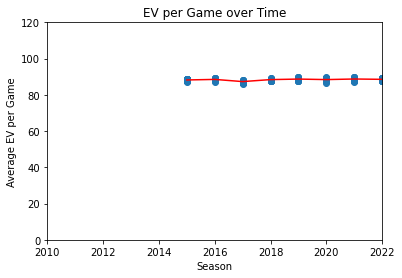

In [120]:
# Let's plot average EV per game over time
plt.scatter(pitching_data['Season'], pitching_data['EV'])
plt.plot(league_averageEV['Season'], league_averageEV['EV'], c='red')
plt.xlim(2010,2022)
plt.ylim(0,120)
plt.xlabel('Season')
plt.ylabel('Average EV per Game')
plt.title('EV per Game over Time');

#unfortunately we only have data since 2015, but you can see that at 88 mph batters are hitting the ball very hard today

In [116]:
#Let’s look at the path of the swing
#LA - Launch Angle represents the vertical angle at which the ball leaves a player's bat after being struck.

league_averageLA = pitching_data.groupby('Season', as_index=False)['LA'].mean()
print (league_averageLA)

     Season         LA
0      1900        NaN
1      1901        NaN
2      1902        NaN
3      1903        NaN
4      1904        NaN
..      ...        ...
118    2018  12.333333
119    2019  12.653333
120    2020  12.726667
121    2021  12.540000
122    2022  12.696667

[123 rows x 2 columns]


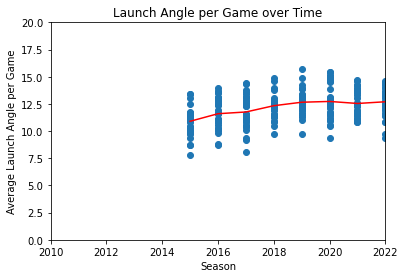

In [181]:
plt.scatter(pitching_data['Season'], pitching_data['LA'])
plt.plot(league_averageLA['Season'], league_averageLA['LA'], c='red')
plt.xlim(2010,2022)
plt.ylim(0,20)
plt.xlabel('Season')
plt.ylabel('Average Launch Angle per Game')
plt.title('Launch Angle per Game over Time');

#As we can see, batters are increasing on average the angle of their swing, this means they are swinging with the intention of elevating the ball.

In [121]:
#This confirms what we are seeing, when hitters steps in the plate they are swinging their shoes off with the intention to lift the ball, but is it working?

#Let's look at HR/9 Rate over time 

league_averageHR = pitching_data.groupby('Season', as_index=False)['HR/9'].mean()
print (league_averageHR)

     Season      HR/9
0      1900  0.231250
1      1901  0.210000
2      1902  0.161875
3      1903  0.153125
4      1904  0.135625
..      ...       ...
118    2018  1.156667
119    2019  1.406000
120    2020  1.341000
121    2021  1.256667
122    2022  1.089667

[123 rows x 2 columns]


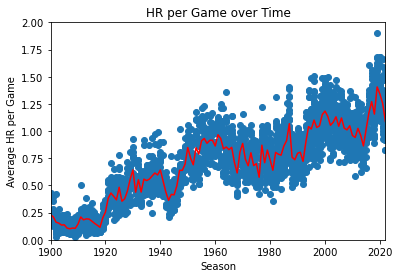

In [148]:
plt.scatter(pitching_data['Season'], pitching_data['HR/9'])
plt.plot(league_averageHR['Season'], league_averageHR['HR/9'], c='red')
plt.xlim(1900,2022)
plt.ylim(0,2)
plt.xlabel('Season')
plt.ylabel('Average HR per Game')
plt.title('HR per Game over Time');

#Yes! A staggering increase in HR/9.

In [149]:
#Hard% (Hard Contact Percentage): Percentage of hard-hit batted balls

league_averageHD = pitching_data.groupby('Season', as_index=False)['Hard%'].mean()
print (league_averageHD)

     Season     Hard%
0      1900       NaN
1      1901       NaN
2      1902       NaN
3      1903       NaN
4      1904       NaN
..      ...       ...
118    2018  0.352400
119    2019  0.380033
120    2020  0.331733
121    2021  0.320867
122    2022  0.301767

[123 rows x 2 columns]


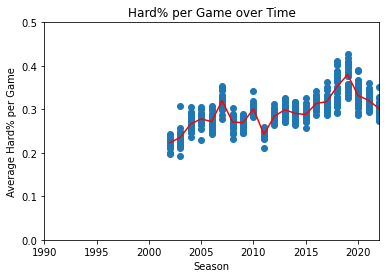

In [184]:
plt.scatter(pitching_data['Season'], pitching_data['Hard%'])
plt.plot(league_averageHD['Season'], league_averageHD['Hard%'], c='red')
plt.xlim(1990,2022)
plt.ylim(0,0.5)
plt.xlabel('Season')
plt.ylabel('Average Hard% per Game')
plt.title('Hard% per Game over Time');

#Not only that hitters are batting the ball harder than ever!

In [135]:
#With so many strikeouts happening and the batted ball data showing more HR and HArd% is clear that something is changing for hitters. 

#But let's see how discipline the batters have become overtime.   
#O-Swing percentage, sometimes referred to as Chase Rate, is the percent of pitches outside of the zone that a hitter swings at
#Z-Swing% - Zone-Swing percentage (Z-Swing%) measures swings at pitches inside the strike zone divided by total pitches inside the zone. 

# get league-average O-Swing% AND Z-Swing% PER game by year
league_averageOSW = pitching_data.groupby('Season', as_index=False)['O-Swing%'].mean()
league_averageZSW = pitching_data.groupby('Season', as_index=False)['Z-Swing%'].mean()
print (league_averageOSW)
print (league_averageZSW)

     Season  O-Swing%
0      1900       NaN
1      1901       NaN
2      1902       NaN
3      1903       NaN
4      1904       NaN
..      ...       ...
118    2018  0.309000
119    2019  0.315867
120    2020  0.306300
121    2021  0.313333
122    2022  0.326567

[123 rows x 2 columns]
     Season  Z-Swing%
0      1900       NaN
1      1901       NaN
2      1902       NaN
3      1903       NaN
4      1904       NaN
..      ...       ...
118    2018  0.673300
119    2019  0.685200
120    2020  0.678200
121    2021  0.689500
122    2022  0.691067

[123 rows x 2 columns]


Text(0.5, 1.0, 'O-Swing% per Game over Time')

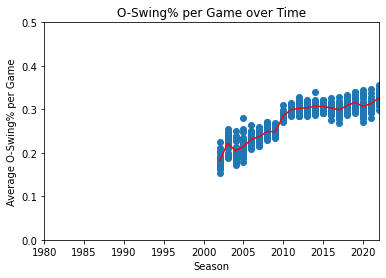

In [136]:
# plot avg. O-Swing%/game over time
plt.scatter(pitching_data['Season'], pitching_data['O-Swing%'])
plt.plot(league_averageOSW['Season'], league_averageOSW['O-Swing%'], c='red')
plt.xlim(1980,2022)
plt.ylim(0,0.5)
plt.xlabel('Season')
plt.ylabel('Average O-Swing% per Game')
plt.title('O-Swing% per Game over Time')

#Take a look at the O-Swing percentages, and you'll notice that hitters have taken to expanding the zone more
#from 2010 on, we see a sharp increase on O-Swing% per game getting well into the 30% Chase Rate.

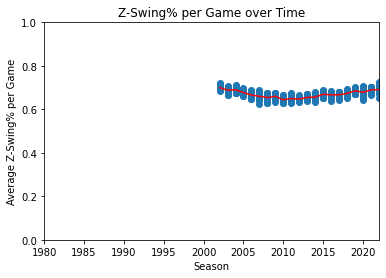

In [137]:
# plot avg. z-Swing%/game over time

plt.scatter(pitching_data['Season'], pitching_data['Z-Swing%'])
plt.plot(league_averageZSW['Season'], league_averageZSW['Z-Swing%'], c='red')
plt.xlim(1980,2022)
plt.ylim(0,1)
plt.xlabel('Season')
plt.ylabel('Average Z-Swing% per Game')
plt.title('Z-Swing% per Game over Time');

#hitters are swinging at far more pitches outside the strike zone. They're also swinging at fewer pitches inside the strike zone.
#This combination of chasing and taking is helping pitchers pile up more strikes, and more strikes are invariably going to lead to more strikeouts

In [138]:
    #We have located where hitters are struggling, but why this is happening. This is all a story about pitchers

league_averageERA = pitching_data.groupby('Season', as_index=False)['ERA'].mean()
print (league_averageERA)

     Season       ERA
0      1900  3.697500
1      1901  3.483125
2      1902  3.170000
3      1903  3.111250
4      1904  2.665000
..      ...       ...
118    2018  4.153000
119    2019  4.508000
120    2020  4.456667
121    2021  4.270667
122    2022  3.971667

[123 rows x 2 columns]


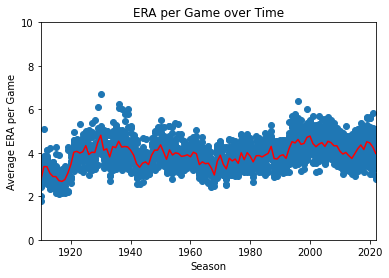

In [140]:
plt.scatter(pitching_data['Season'], pitching_data['ERA'])
plt.plot(league_averageERA['Season'], league_averageERA['ERA'], c='red')
plt.xlim(1910,2022)
plt.ylim(0,10)
plt.xlabel('Season')
plt.ylabel('Average ERA per Game')
plt.title('ERA per Game over Time');


#League ERA not surprisingly has been declining since 2010, the decline of ERAs and the rise of strikeouts has to do with 
#a rise in strikes

In [141]:
#CSW% - takes a pitcher's called strikes, swings and misses, and total pitches thrown to calculate the percentage of pitches
#that resulted in a called or swinging strike.

league_averageCSW = pitching_data.groupby('Season', as_index=False)['CSW%'].mean()
print (league_averageCSW)

     Season      CSW%
0      1900       NaN
1      1901       NaN
2      1902       NaN
3      1903       NaN
4      1904       NaN
..      ...       ...
118    2018  0.275967
119    2019  0.276233
120    2020  0.281867
121    2021  0.277233
122    2022  0.275267

[123 rows x 2 columns]


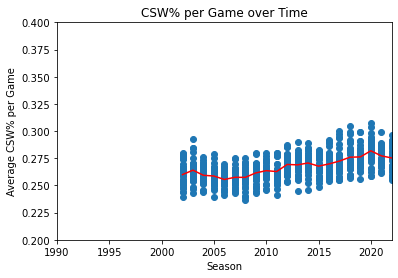

In [185]:
plt.scatter(pitching_data['Season'], pitching_data['CSW%'])
plt.plot(league_averageCSW['Season'], league_averageCSW['CSW%'], c='red')
plt.xlim(1990,2022)
plt.ylim(0.2,0.4)
plt.xlabel('Season')
plt.ylabel('Average CSW% per Game')
plt.title('CSW% per Game over Time');

#In 2020 we reach for the first time in history the 28% treshold. This means of all pitches thrown 28% resulted in a strike. 
#Pitchers in today's day and age are throwing more strikes than ever.

In [144]:
#Let's see the quality of those pitches measuring velocity AND vertical movement 
#The following are the average vertical movements of the pitches according to PITCHf/x. The name of the pitch is next to each. (Numbers are relative to a pitch with no spin, meaning gravity’s effect is removed)

#First Velocity

#Fastballs

league_averagevFA = pitching_data.groupby('Season', as_index=False)['vFA (sc)'].mean()
print (league_averagevFA)

     Season   vFA (sc)
0      1900        NaN
1      1901        NaN
2      1902        NaN
3      1903        NaN
4      1904        NaN
..      ...        ...
118    2018  93.160000
119    2019  93.400000
120    2020  93.316667
121    2021  93.623333
122    2022  93.793333

[123 rows x 2 columns]


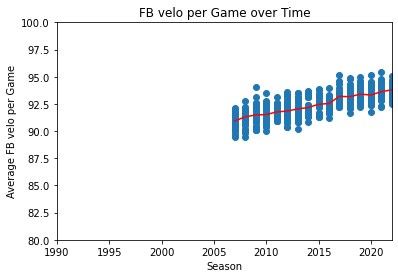

In [189]:
plt.scatter(pitching_data['Season'], pitching_data['vFA (sc)'])
plt.plot(league_averagevFA['Season'], league_averagevFA['vFA (sc)'], c='red')
plt.xlim(1990,2022)
plt.ylim(80,100)
plt.xlabel('Season')
plt.ylabel('Average FB velo per Game')
plt.title('FB velo per Game over Time');

In [190]:
#Sinkers 
league_averageveloSI = pitching_data.groupby('Season', as_index=False)['vSI (sc)'].mean()
print (league_averageveloSI)


     Season   vSI (sc)
0      1900        NaN
1      1901        NaN
2      1902        NaN
3      1903        NaN
4      1904        NaN
..      ...        ...
118    2018  91.560000
119    2019  92.073333
120    2020  92.600000
121    2021  93.073333
122    2022  93.346667

[123 rows x 2 columns]


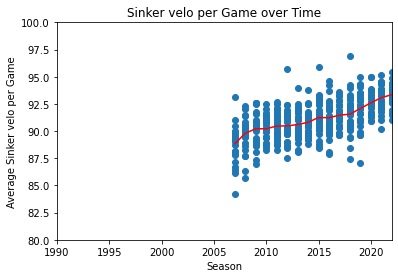

In [191]:
plt.scatter(pitching_data['Season'], pitching_data['vSI (sc)'])
plt.plot(league_averageveloSI['Season'], league_averageveloSI['vSI (sc)'], c='red')
plt.xlim(1990,2022)
plt.ylim(80,100)
plt.xlabel('Season')
plt.ylabel('Average Sinker velo per Game')
plt.title('Sinker velo per Game over Time');

In [192]:
#Sliders
league_averageveloSL = pitching_data.groupby('Season', as_index=False)['vSL (sc)'].mean()
print (league_averageveloSL)

     Season   vSL (sc)
0      1900        NaN
1      1901        NaN
2      1902        NaN
3      1903        NaN
4      1904        NaN
..      ...        ...
118    2018  84.333333
119    2019  84.603333
120    2020  84.280000
121    2021  84.670000
122    2022  84.553333

[123 rows x 2 columns]


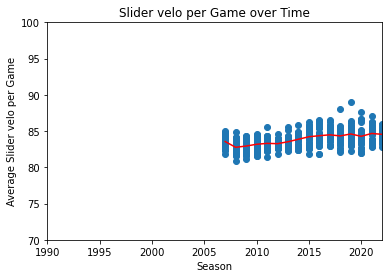

In [194]:
plt.scatter(pitching_data['Season'], pitching_data['vSL (sc)'])
plt.plot(league_averageveloSL['Season'], league_averageveloSL['vSL (sc)'], c='red')
plt.xlim(1990,2022)
plt.ylim(70,100)
plt.xlabel('Season')
plt.ylabel('Average Slider velo per Game')
plt.title('Slider velo per Game over Time');

In [195]:
#Change-ups
league_averageveloCH = pitching_data.groupby('Season', as_index=False)['vCH (sc)'].mean()
print (league_averageveloCH)

     Season   vCH (sc)
0      1900        NaN
1      1901        NaN
2      1902        NaN
3      1903        NaN
4      1904        NaN
..      ...        ...
118    2018  84.316667
119    2019  84.593333
120    2020  84.503333
121    2021  84.870000
122    2022  85.226667

[123 rows x 2 columns]


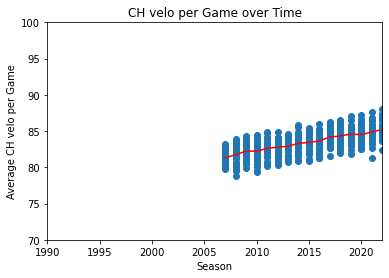

In [196]:
plt.scatter(pitching_data['Season'], pitching_data['vCH (sc)'])
plt.plot(league_averageveloCH['Season'], league_averageveloCH['vCH (sc)'], c='red')
plt.xlim(1990,2022)
plt.ylim(70,100)
plt.xlabel('Season')
plt.ylabel('Average CH velo per Game')
plt.title('CH velo per Game over Time');

In [197]:
#Vertical Movement
#Vertical Movement (pfx_z) because is vertical (up-down) movement of the pitch during the last 40 feet before the front of home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement.

league_averageFAv = pitching_data.groupby('Season', as_index=False)['FA-Z (sc)'].mean()
print (league_averageFAv)


     Season  FA-Z (sc)
0      1900        NaN
1      1901        NaN
2      1902        NaN
3      1903        NaN
4      1904        NaN
..      ...        ...
118    2018   9.126667
119    2019   9.063333
120    2020   9.330000
121    2021   9.416667
122    2022   9.366667

[123 rows x 2 columns]


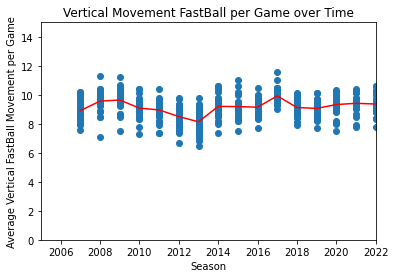

In [201]:
plt.scatter(pitching_data['Season'], pitching_data['FA-Z (sc)'])
plt.plot(league_averageFAv['Season'], league_averageFAv['FA-Z (sc)'], c='red')
plt.xlim(2005,2022)
plt.ylim(0,15)
plt.xlabel('Season')
plt.ylabel('Average Vertical FastBall Movement per Game')
plt.title('Vertical Movement FastBall per Game over Time');

In [165]:
#Sliders
league_averagevSL = pitching_data.groupby('Season', as_index=False)['SL-Z (sc)'].mean()
print (league_averagevSL)

     Season  SL-Z (sc)
0      1900        NaN
1      1901        NaN
2      1902        NaN
3      1903        NaN
4      1904        NaN
..      ...        ...
118    2018       1.13
119    2019       1.23
120    2020       1.02
121    2021       1.22
122    2022       1.25

[123 rows x 2 columns]


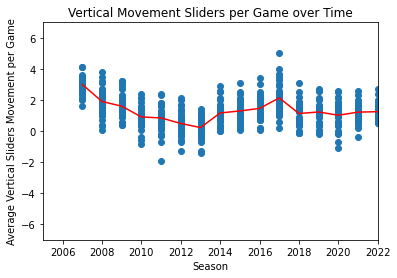

In [202]:
plt.scatter(pitching_data['Season'], pitching_data['SL-Z (sc)'])
plt.plot(league_averagevSL['Season'], league_averagevSL['SL-Z (sc)'], c='red')
plt.xlim(2005,2022)
plt.ylim(-7,7)
plt.xlabel('Season')
plt.ylabel('Average Vertical Sliders Movement per Game')
plt.title('Vertical Movement Sliders per Game over Time');

In [172]:
#Sinkers
league_averagevSI = pitching_data.groupby('Season', as_index=False)['SI-Z (sc)'].mean()
print (league_averagevSI)

     Season  SI-Z (sc)
0      1900        NaN
1      1901        NaN
2      1902        NaN
3      1903        NaN
4      1904        NaN
..      ...        ...
118    2018   4.383333
119    2019   4.360000
120    2020   5.586667
121    2021   5.413333
122    2022   5.186667

[123 rows x 2 columns]


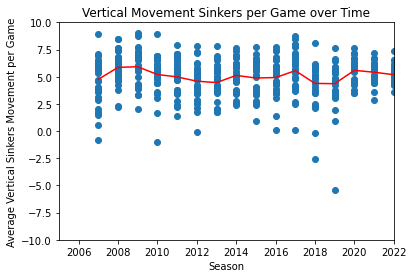

In [203]:
plt.scatter(pitching_data['Season'], pitching_data['SI-Z (sc)'])
plt.plot(league_averagevSI['Season'], league_averagevSI['SI-Z (sc)'], c='red')
plt.xlim(2005,2022)
plt.ylim(-10,10)
plt.xlabel('Season')
plt.ylabel('Average Vertical Sinkers Movement per Game')
plt.title('Vertical Movement Sinkers per Game over Time');

In [205]:
#Change-Up
league_averagevmCH = pitching_data.groupby('Season', as_index=False)['CH-Z (sc)'].mean()
print (league_averagevmCH)


     Season  CH-Z (sc)
0      1900        NaN
1      1901        NaN
2      1902        NaN
3      1903        NaN
4      1904        NaN
..      ...        ...
118    2018   4.140000
119    2019   4.363333
120    2020   4.173333
121    2021   4.156667
122    2022   3.860000

[123 rows x 2 columns]


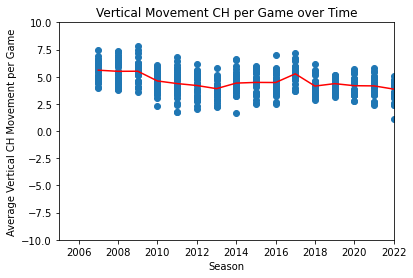

In [207]:
plt.scatter(pitching_data['Season'], pitching_data['CH-Z (sc)'])
plt.plot(league_averagevmCH['Season'], league_averagevmCH['CH-Z (sc)'], c='red')
plt.xlim(2005,2022)
plt.ylim(-10,10)
plt.xlabel('Season')
plt.ylabel('Average Vertical CH Movement per Game')
plt.title('Vertical Movement CH per Game over Time');


In [103]:
#TTO% - The "three true outcomes" in baseball are said to be a home run, a walk or a strikeout due to the fact that none of the three, with the rare exception of an inside-the-park home run or a strikeout with a dropped third strike, involve the defense beyond the pitcher or the catcher.

league_averageTTO = pitching_data.groupby('Season', as_index=False)['TTO%'].mean()
print (league_averageTTO)

     Season      TTO%
0      1900       NaN
1      1901       NaN
2      1902       NaN
3      1903       NaN
4      1904       NaN
..      ...       ...
118    2018  0.337600
119    2019  0.351333
120    2020  0.360767
121    2021  0.351633
122    2022  0.334500

[123 rows x 2 columns]


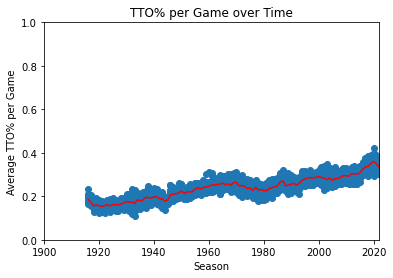

In [106]:
plt.scatter(pitching_data['Season'], pitching_data['TTO%'])
plt.plot(league_averageTTO['Season'], league_averageTTO['TTO%'], c='red')
plt.xlim(1900,2022)
plt.ylim(0,1)
plt.xlabel('Season')
plt.ylabel('Average TTO% per Game')
plt.title('TTO% per Game over Time');

In [ ]:
#To recap:

#Hitters are swinging out of their shoes aiming for the fences (HR/9, Hard%, LA are up across the board)
#Hitters are swinging and missing much more (proved by o-swing and z-swing rate)
#Pitchers are throwing more strikes (sharp increase on CSW%)
#Pitchers are throwing harder, better, and nastier pitches (Velocity and Vertical movement up)

In [107]:
list(pitching_data.columns)

['teamIDfg',
 'Season',
 'Team',
 'Age',
 'W',
 'L',
 'ERA',
 'G',
 'GS',
 'CG',
 'ShO',
 'SV',
 'BS',
 'IP',
 'TBF',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'HBP',
 'WP',
 'BK',
 'SO',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'WHIP',
 'BABIP',
 'LOB%',
 'FIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'Relieving',
 'Relief-IP',
 'RAR',
 'WAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'FB% 2',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F

In [ ]:
#of the previous list this is some of the most interesting statistics and their definitions

#let's see all the statistics that we have at our disposal


#LD - Line Drive Rates represents the percentage of balls hit into the field of play that are characterized as line drives
#IFH -  (Infield Hit Percentage)
#BUH - The number of hits a batter achieved by bunting the ball.
#BB/9
#BABIP - measures a player's batting average exclusively on balls hit into the field of play
#FIP - stands for Fielding Independent Pitching. It is a statistic meant to measure a pitcher's effectiveness, taking plays that would involve the defense trying to field the ball out of the equation
#HR/FB - HR vs FB rate  
#tERA - True Earned Run Average, like FIP, attempts to quantify a pitcher's performance based on what he can control. But unlike FIP -- which factors only home runs, strikeouts, walks and HBPs -- tERA also accounts for batted-ball tendencies.
#RE24 (runs above average by the 24 base/out states): RE24 is the difference in run expectancy (RE) between the start of the play and the end of the play. That difference is then credited/debited to the batter and the pitcher.
#xFIP finds a pitcher's FIP, but it uses projected home-run rate instead of actual home runs allowed. The home run rate is determined by that season's league average HR/FB rate.
#O-Swing% - O-Swing percentage, sometimes referred to as Chase Rate, is the percent of pitches outside of the zone that a hitter swings at.
#Z-Swing% - Zone-Swing percentage (Z-Swing%) measures swings at pitches inside the strike zone divided by total pitches inside the zone. 
#O-Contact%: How often swings at pitches outside the zone make contact.
#reContact% -  At bats minus strikeouts divided by at bats. This basically means the percentage of times the particular batter makes contact with ball, 
#SwStr% - Swinging-strike percentage (SwStr%) is a measure of pitches hitters swing and miss at divided by total pitches thrown by a pitcher. 
#SIERA - quantifies a pitcher's performance by trying to eliminate factors the pitcher can't control by himself. But unlike a stat such as xFIP, SIERA considers balls in play and adjusts for the type of ball in play.
#Pace is a measure of the seconds between pitches for both hitters and pitchers based on PITCHf/x timestamps
#TTO% - The "three true outcomes" in baseball are said to be a home run, a walk or a strikeout due to the fact that none of the three, with the rare exception of an inside-the-park home run or a strikeout with a dropped third strike, involve the defense beyond the pitcher or the catcher.
#EV - Exit Velocity measures the speed of the baseball as it comes off the bat, immediately after a batter makes contact.
#LA - Launch Angle represents the vertical angle at which the ball leaves a player's bat after being struck.
#CSW% - takes a pitcher's called strikes, swings and misses, and total pitches thrown to calculate the percentage of pitches that resulted in a called or swinging strike.
#Called-strike percentage (CStr%) is precisely what it sounds like. It is the number of pitches that an umpire deems a strike divided by the total pitches thrown.
#BARRELS - To be Barreled, a batted ball requires an exit velocity of at least 98 mph. At that speed, balls struck with a launch angle between 26-30 degrees always garner Barreled classification. For every mph over 98, the range of launch angles expands. 
